<a href="https://colab.research.google.com/github/SaijyotiTripathy/Data-Analysis-with-Python/blob/main/Pandas_Reading_CSV_and_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

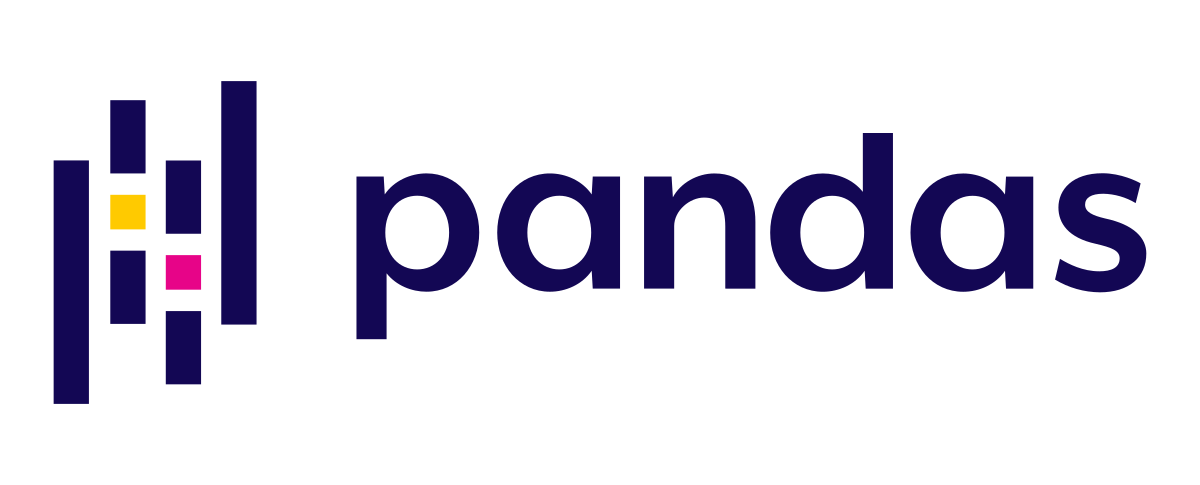

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# **Reading CSV**

Pandas can easily read data stored in different file formats like CSV, JSON, XML or even Excel. Parsing always involves specifying the correct structure, encoding and other details. The `read_csv` method reads CSV files and accepts many parameters.

In [2]:
# structure of read_csv

pd.read_csv?

In [3]:
df= pd.read_csv('/content/btc-market-price.csv')

In [4]:
df.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


The CSV file we're reading has only two columns: `timestamp` and `price` with no headers.The file contains whitespaces and has values separated by commas. Pandas automatically assigned the first row of data as headers, which is incorrect. We can overwrite this behavior with the `header` parameter:

In [5]:
df= pd.read_csv('/content/btc-market-price.csv',header=None)

In [6]:
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


Setting the names of each column explicitely by setting the `df.columns` attribute:

In [7]:
df.columns= ['Timestamp','Price']

In [8]:
df.shape

(365, 2)

In [9]:
df.head()

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [10]:
df.tail(4)

,Timestamp,Price
361,2018-03-29 00:00:00,7172.280000
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000
364,2018-04-01 00:00:00,6794.105000


In [11]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

The type of the `Price` column was correctly interpreted as `float`, but the `Timestamp` was interpreted as a regular string (`object` in pandas notation):

We can perform a vectorized operation to parse all the Timestamp values as `Datetime` objects:

In [12]:
pd.to_datetime(df['Timestamp']).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Timestamp, dtype: datetime64[ns]

In [13]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

In [14]:
# saves it to the column

df['Timestamp']= pd.to_datetime(df['Timestamp'])

In [15]:
df.head()

,Timestamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


In [16]:
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

Setting the `Timestamp` as our index so as to quickly access information

In [17]:
df.set_index('Timestamp', inplace=True)

In [18]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [19]:
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

## **Putting all these together**

What we have done till now
1. read csv without header
2. create the columns
3. turn the `Timestamp` to datetime
4. assign `Timestamp` to index

The `read_csv` function is extremely powerful and you can specify many more parameters at import time. We can achive the same results with only one line by doing:

In [20]:
df = pd.read_csv(
    '/content/btc-market-price.csv',
    header=None,
    names=['Timestamp', 'Price'],
    index_col=0,
    parse_dates=True
)

In [21]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [22]:
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

# **Plotting Basics**

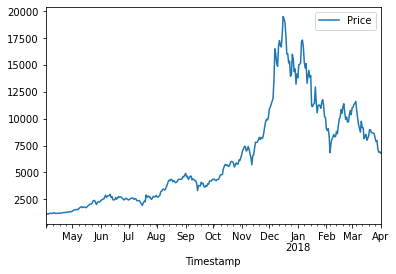

In [23]:
df.plot()

`pandas` integrates with Matplotlib and uses `matplotlib.pyplot`'s interface to plot this graph. <br>
We can create a similar plot with the `plt.plot()` function:

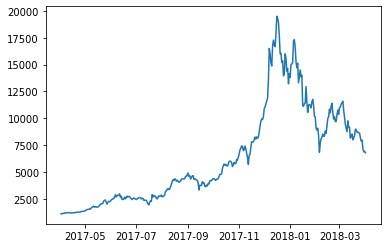

In [24]:
plt.plot(df.index, df['Price'])

`plt.plot()` accepts many parameters, but the first two ones are the most important ones: the values for the `X` and `Y` axes.

In [25]:
x= np.arange(-10, 11)

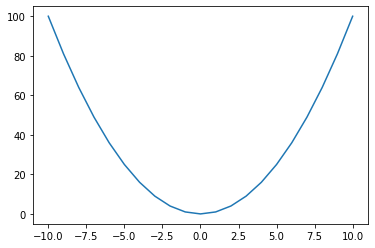

In [26]:
plt.plot(x, x**2)

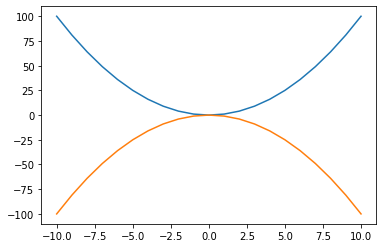

In [27]:
plt.plot(x, x**2)
plt.plot(x, -1*(x**2))

We're using `matplotlib`'s global API,  the most popular one.

Each `plt` function alters the global state. If you want to set settings of your plot you can use the `plt.figure` function. Others like `plt.title` keep altering the global plot:

Text(0.5, 1.0, '2 graphs')

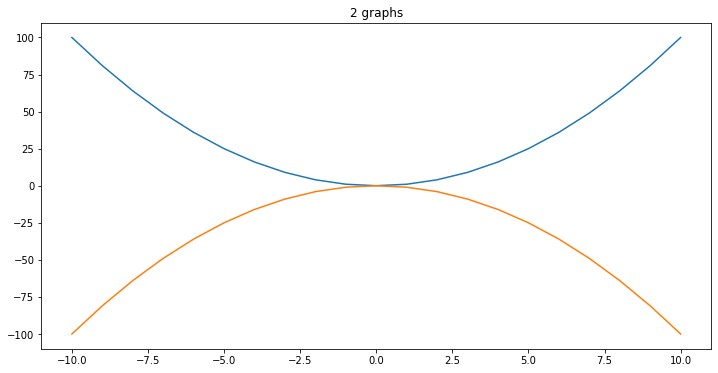

In [28]:
plt.figure(figsize=(12,6))
plt.plot(x, x**2)
plt.plot(x, -1*(x**2))

plt.title('2 graphs')

Some of the arguments in `plt.figure` and `plt.plot` are available in the pandas' `plot` interface

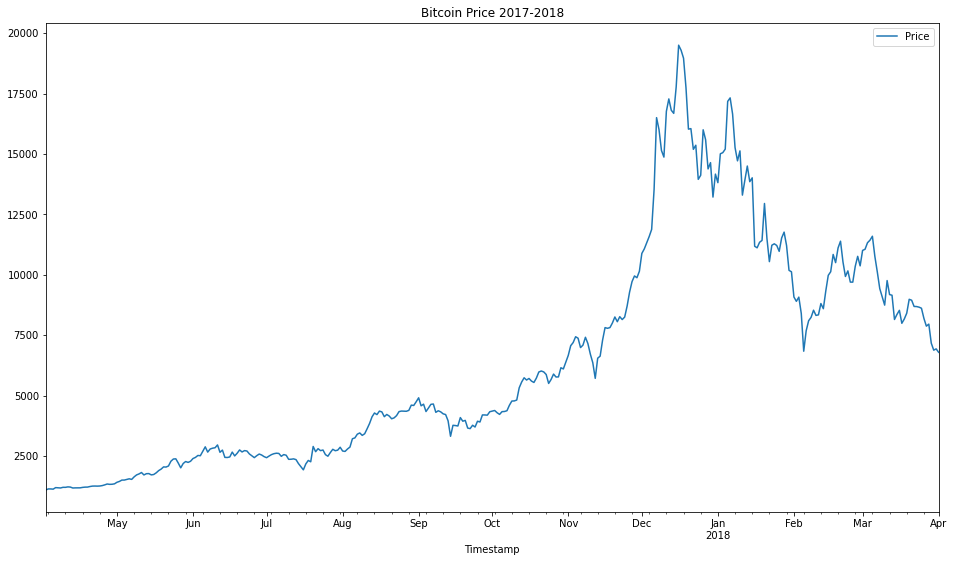

In [29]:
df.plot(figsize=(16,9), title='Bitcoin Price 2017-2018')

## **More Parsing**

## A more challenging parsing

To demonstrate plotting two columns together, we'll try to add Ether prices to our `df` DataFrame.

In [30]:
eth= pd.read_csv('/content/eth-price.csv')
eth.head()

,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


`Value` column represents the price, `Date(UTC)` column has a string representing dates and also `UnixTimeStamp` date representing the datetime in unix timestamp format. 

In [31]:
eth.dtypes

Date(UTC)         object
UnixTimeStamp      int64
Value            float64
dtype: object

In [32]:
eth= pd.read_csv('/content/eth-price.csv', parse_dates=True)

In [33]:
print(eth.dtypes)
eth.head()

Date(UTC)         object
UnixTimeStamp      int64
Value            float64
dtype: object


,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


Since the `parse_dates` attribute didn't work, we'll use the `UnixTimeStamp` column. The `pandas` module has a `to_datetime` function that converts Unix timestamps to Datetime objects automatically.

In [34]:
pd.to_datetime(eth['UnixTimeStamp']).head()

0   1970-01-01 00:00:01.491091200
1   1970-01-01 00:00:01.491177600
2   1970-01-01 00:00:01.491264000
3   1970-01-01 00:00:01.491350400
4   1970-01-01 00:00:01.491436800
Name: UnixTimeStamp, dtype: datetime64[ns]

To match both columns of eth and bitcoin data and we'll need to use the same index.

In [35]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


Since the index of the `df` containing Bitcoin prices, is "per day", we could either, remove the precision of `UnixTimeStamp` or attempt to parse the `Date(UTC)`.

In [36]:
# string parsing the Date(UTC)

pd.to_datetime(eth['Date(UTC)']).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Date(UTC), dtype: datetime64[ns]

That seems to work fine! Why isn't it then parsing the `Date(UTC)` column? 
<br>The `parse_dates=True` parameter will instruct pandas to parse the index of the `DataFrame`. If you want to parse any other column, you must explicitly pass the column position or name

In [37]:
pd.read_csv('/content/eth-price.csv', parse_dates=[0]).head()

,Date(UTC),UnixTimeStamp,Value
0,2017-04-02,1491091200,48.55
1,2017-04-03,1491177600,44.13
2,2017-04-04,1491264000,44.43
3,2017-04-05,1491350400,44.90
4,2017-04-06,1491436800,43.23


**Putting everything together**

In [38]:
eth= pd.read_csv('/content/eth-price.csv', parse_dates=True, index_col=0)
eth.head()

,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1491091200,48.55
2017-04-03,1491177600,44.13
2017-04-04,1491264000,44.43
2017-04-05,1491350400,44.90
2017-04-06,1491436800,43.23


In [39]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UnixTimeStamp  362 non-null    int64  
 1   Value          362 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.5 KB


Combining both `DataFrame`s into one. Both have the same index, so aligning both prices will be easy. 

In [40]:
# Creating an empty DataFrame with the index from Bitcoin prices

prices= pd.DataFrame(index= df.index)
prices.head()

""
Timestamp
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06


In [41]:
# setting columns from other DataFrames

prices['Bitcoin']= df['Price']
prices['Ether']= eth['Value']

In [42]:
prices.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


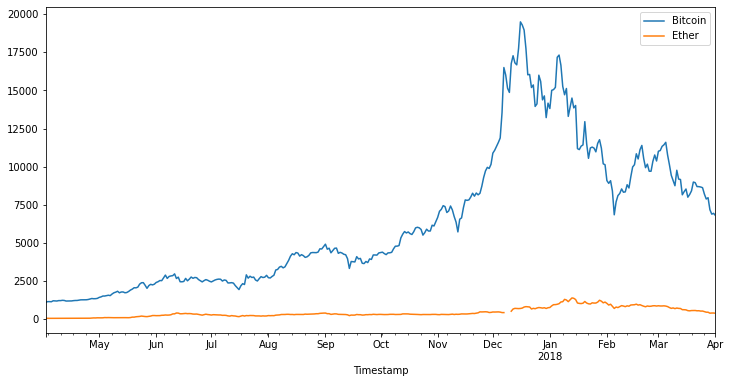

In [43]:
# plotting both values

prices.plot(figsize=(12, 6))

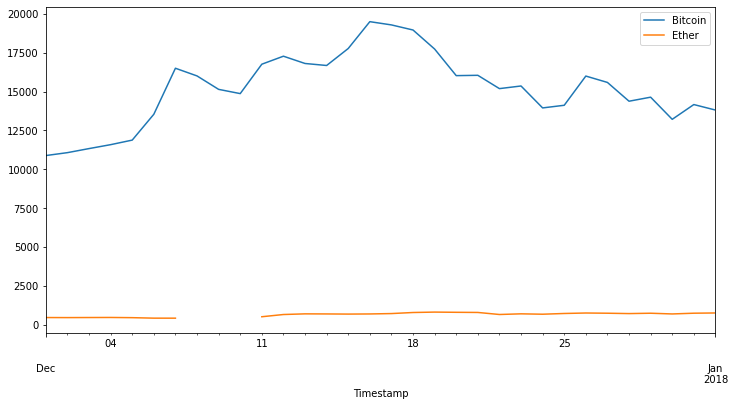

In [44]:
# zooming into the tiny gap using indexing

prices.loc['2017-12-01':'2018-01-01'].plot(figsize=(12,6))